<a href="https://colab.research.google.com/github/brunoodon/mvp_sprintII/blob/main/C%C3%B3pia_de_MVP_SprintII(B)_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Machine Learning & Analytics - Sprint II(B)
### Bruno Odon

## Descrição do problema

Instalando as bibliotecas TensorFlow e Keras

In [2]:
!pip install tensorflow
!pip install keras

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!mkdir -pv datasets/music
!wget 'https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music.zip' -P datasets/

--2023-07-20 05:23:05--  https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10632185 (10M) [application/zip]
Saving to: ‘datasets/music.zip.3’

music.zip.3         100%[===================>]  10.14M  --.-KB/s    in 0.05s   

2023-07-20 05:23:06 (218 MB/s) - ‘datasets/music.zip.3’ saved [10632185/10632185]



In [5]:
import zipfile
dataset = 'datasets/music.zip'
dest = 'datasets/music/'
with zipfile.ZipFile(dataset,'r') as zip_ref:
  zip_ref.extractall(dest)

In [6]:
#verificando o número de imagens que foram extraídas
path='datasets/music/'
print(f"Temos um total de {len(os.listdir(path))} imagens em nosso dataset")

#exemplos de algumas imagens extraídas
print(f"Primeiras 20 imagens: \n {os.listdir(path)[:20]}")


Temos um total de 2596 imagens em nosso dataset
Primeiras 20 imagens: 
 ['1634117972100_Guitar Back Amp with Powered Pa System for sale.jpg', '1634112498970_BOYA BYWHM8 Pro Wireless Handheld Microphone for sale.jpg', '1634112358159_Pioneer EFX500 DJ Effects ControllerJAPAN for sale.jpg', '1634118001273_Boya M1DM Dual Mic for sale.jpg', '1634111157863_YAMAHA Piano for sale.jpg', '1634112841166_Dj Light Stand for sale.jpg', '1634112920947_Guitar for sale.jpg', '1634110584381_Electric Guitar for sale.jpg', '1634117638438_Fiber Dholky for sale.jpg', '1634117578620_Cashio organ for sale.jpg', '1634117867993_Pro instrument cable for sale.jpg', '1634109704493_Saxaphone  Soprano for sale.jpg', '1634110189621_YAMAHA FX900 SIMULEFFECT PROCESSOR for sale.jpg', '1634112802198_Japan Amplifier for sale.jpg', '1634110386536_Professional Studio Recording Microphone Stand Small for sale.jpg', '1634112801953_DJ System for sale.jpg', '1634112953454_Warwick Rockbass Streamer lx 5 Bass Guitar for sale.jpg'

In [7]:
from sklearn.preprocessing import FunctionTransformer
import re
#Criando um DataFrame com as informações das imagens

images = os.listdir(path)
labels, heights, widths, channels, filesize, files = [], [], [], [], [], []

# Loop que percorre cada uma das imagens extraídas
guitar_count=0
for fname in images:
    try:
      def file_settings():
          img_shape = mpimg.imread(path+fname).shape
          heights.append(img_shape[0])
          widths.append(img_shape[1])
          channels.append(img_shape[2])
          filesize.append(os.path.getsize(path+fname))
      inst_type = str(fname)[14:].replace('.jpg', '').replace('for sale', '')
      if not ("Amplifier" or "Amp" or "Speaker" or "Cube" or "pedals" or "Pedals" or "Pedal" or "Preamp" or "String" or "Speaker") in inst_type:
        if "Microphone" in inst_type:
          name = "Microphone"
          files.append(fname)
          labels.append(name)
          file_settings()
        if "Drums" in inst_type:
          name = "Drums"
          files.append(fname)
          labels.append(name)
          file_settings()
        if "Piano" in inst_type:
          name = "Piano"
          files.append(fname)
          labels.append(name)
          file_settings()
        if ("Guitar" or "Guitars" or "GUITAR" or "guitar") in inst_type and guitar_count <= 100:
          guitar_count = guitar_count + 1
          name = "Guitar"
          files.append(fname)
          labels.append(name)
          file_settings()
    except:
      print('Não foi possível')
# Criação do dataset
df = pd.DataFrame({'images': files, 'class': labels, 'height': heights, 'width': widths, 'channels': channels, 'filesize': filesize})
df.sample(frac=1).reset_index(drop=True).head(120)



,images,class,height,width,channels,filesize
0,1634113133945_Ariapro ii Ctseries Guitar for s...,Guitar,107,142,3,4181
1,1634112498970_BOYA BYWHM8 Pro Wireless Handhel...,Microphone,107,142,3,2112
2,1634112498597_Electronic Keyboard Piano for sa...,Piano,107,142,3,4970
3,1634112879021_Fender Stratocaster Electric Gui...,Guitar,107,142,3,3557
4,1634112412416_Kawai Digital Piano CN33 for sal...,Piano,107,142,3,3831
...,...,...,...,...,...,...
115,1634112552255_BM 800 Condenser Microphone for ...,Microphone,107,142,3,3600
116,1634117799047_Drums for sale.jpg,Drums,107,142,3,3267
117,1634110989079_Pearl Acoustic Drums for sale.jpg,Drums,107,142,3,5482
118,1634110425567_CBechstein Piano for sale.jpg,Piano,107,142,3,4207


Guitar        101
Microphone     96
Piano          87
Drums          19
Name: class, dtype: int64


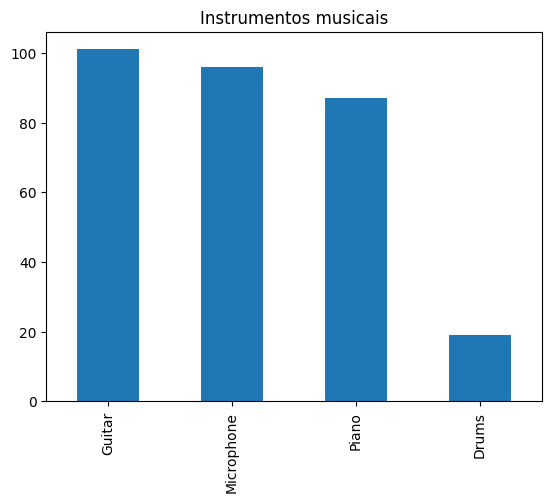

In [8]:
#Visualizando a proporção de imagens por classe
print((df['class']).value_counts())
instruments_count = df['class'].value_counts().plot.bar(title='Instrumentos musicais')

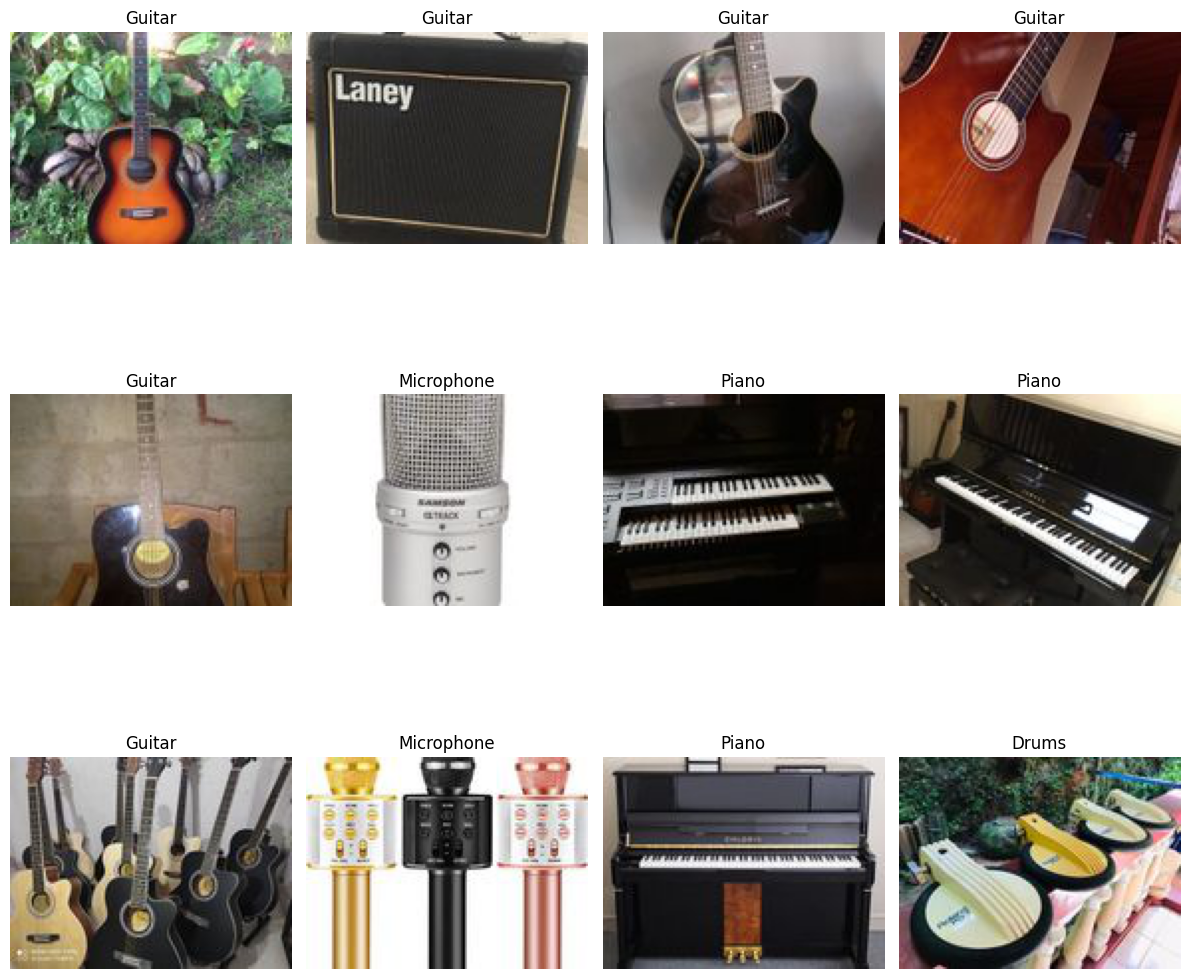

In [9]:
#Visualizando algumas imagens do conjunto de dados
import matplotlib.pyplot as plt
from PIL import Image
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)
df_random = df.sample(frac=1).reset_index(drop=True).head(12)
for i, row in df_random.iterrows():
    sp = plt.subplot(3, 4, i + 1)
    sp.axis('Off')
    classe = row['class']
    img_name = row['images']
    img_path = os.path.join(path, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(classe)
plt.tight_layout()
plt.show()

In [10]:
#Dividindo o dataset em 70% para treino e 30% para teste
train, test = train_test_split(df[['images', 'class', 'height', 'width', 'channels', 'filesize']], test_size=0.3, random_state=42, shuffle=True)
#visualizando a divisão dos dados:
print("CONJUNTO DE TREINO")
display(train)
print("CONJUNTO DE TESTE")
display(test)

CONJUNTO DE TREINO


,images,class,height,width,channels,filesize
124,1634111080881_Toyama Acoustic Box Guitar for s...,Guitar,107,142,3,6222
72,1634112309530_Yamaha U2 F Piano for sale.jpg,Piano,107,142,3,4870
15,1634113370986_Left Hand Electric Guitar for sa...,Guitar,107,142,3,4849
10,1634112879021_Fender Stratocaster Electric Gui...,Guitar,107,142,3,3557
163,1634113320411_Bm 800 Microphone With Soundcard...,Microphone,107,142,3,4750
...,...,...,...,...,...,...
188,1634112720772_Alesis V49 Piano for sale.jpg,Piano,107,142,3,2165
71,1634111075721_Schafer Sons Piano Peterson Ce...,Piano,107,142,3,4038
106,1634112413515_Schumann W121 Acoustic Piano for...,Piano,107,142,3,4016
270,1634112411625_J Thompson Acoustic Piano for sa...,Piano,107,142,3,4001


CONJUNTO DE TESTE


,images,class,height,width,channels,filesize
179,1634111262189_Jembe Drums for sale.jpg,Drums,107,142,3,5089
228,1634110467733_Lavalier Microphone KM002 for sa...,Microphone,107,142,3,3219
111,1634113272540_Guitar Stand Marvis Brand New ...,Guitar,107,142,3,2457
246,1634112408429_Hermann Acoustic Piano for sale.jpg,Piano,107,142,3,3859
60,1634110763858_Delta King Guitar for sale.jpg,Guitar,107,142,3,2905
...,...,...,...,...,...,...
250,1634111805580_Yamaha Piano for sale.jpg,Piano,107,142,3,3842
19,1634113404952_yamaha bbn5 japan bass Guitar fo...,Guitar,107,142,3,3885
143,1634112503826_Mobile Microphone for sale.jpg,Microphone,107,142,3,3319
79,1634111596043_4 Channel Mixer With Microphones...,Microphone,107,142,3,3814


# Preparação dos dados

ImageDataGenerator é uma classe utilitária fornecida pelo TensorFlow para aumentar e pré-processar dados de imagens. É comumente usada em tarefas de deep learning, especialmente para classificação de imagens, para gerar imagens aumentadas (data augmentation) sob demanda durante o treinamento do modelo.

Utilizamos ainda o ImageDataGenerator para separar um conjunto de validação com 20% das amostras do conjunto de treino. É importante que o conjunto de validação não contenha as imagens de teste, tendo em vista que elas não deveriam ser conhecidas no momento do treinamento.

Veja que neste caso é usado o método flow_from_dataframe() para gerar imagens aumentadas a partir de um dataframe que aponta para as imagens originais. O método recebe parâmetros como o dataframe, o diretório com as imagens, o tamanho do lote (batch size) e o modo de classe (neste caso, binário porque são apenas duas classes), entre outros.

Importante ressaltar que o pré-processamento do teste não evolve o aumento de dados.

In [11]:
train_datagen=ImageDataGenerator(validation_split=0.2, #include validation split
                                 rescale = 1.0/255,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_dataframe(
    train, path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',
    subset='training' #training set
    )

val_generator=train_datagen.flow_from_dataframe(
    train, path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',
    subset='validation' #validation set
    )

test_generator=test_datagen.flow_from_dataframe(
    test, path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class')

Found 170 validated image filenames belonging to 4 classes.
Found 42 validated image filenames belonging to 4 classes.
Found 91 validated image filenames belonging to 4 classes.


Visualizando um exemplo do tratamento das imagens

Found 1 validated image filenames belonging to 1 classes.


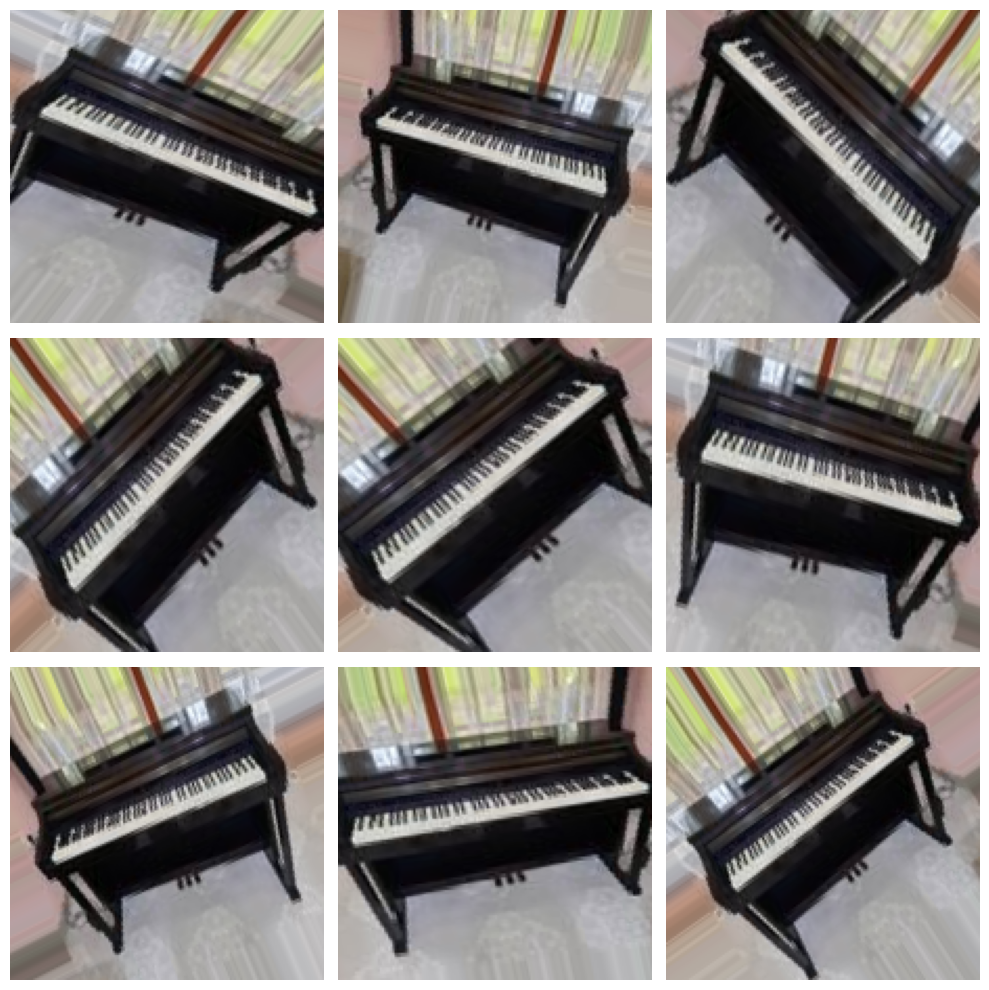

In [12]:
# Pegando um registro do dataframe
sample = df.sample(n=1)

# Neste caso o tipo de classe é categorico, pois temos um exemplo com apenas uma classe
sample_generator = train_datagen.flow_from_dataframe(
    sample,
    path,
    x_col='images',
    y_col='class',
    target_size=(150,150),
    class_mode='categorical'
)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

# Configuração de um modelo de deep learning usando uma rede neural convolucional (CNN) simples com a biblioteca Keras

Definição da arquitetura do modelo
Aqui é especificada uma camada convolucional 2D que possui 32 filtros, um tamanho de filtro de 3x3 que usa a função de ativação ReLU. O parâmetro input_shape define a forma das imagens de entrada para a rede. Na sequência são adicionadas camadas max-pooling com a mesma função de ativação.

In [28]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

O método summary() é usado para exibir um resumo da arquitetura do modelo de rede neural. Ele fornece uma representação compacta das camadas do modelo e seus parâmetros, incluindo o número de parâmetros treináveis e a forma de saída de cada camada.

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

# Treinamento do modelo de deep learning

Compilação do modelo Keras com as configurações do treinamento
optimizer='adam': especifica o otimizador a ser usado durante o treinamento.

loss='binary_crossentropy': especifica a função de perda a ser usada durante o treinamento. Para problemas de classificação binária, onde a variável alvo tem apenas duas categorias, a perda binária de entropia cruzada é freqüentemente empregada.

metrics=['accuracy']: especifica as métricas de avaliação a serem usadas durante o treinamento e o teste.

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

O método fit_generator() inicia o processo de treinamento do modelo usando o gerador de dados para o treinamento train_generator e o gerador de dados de validação val_generator.

In [31]:
epochs = 20
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/20
4/4 [==============================] - 13s 3s/step - loss: 1.7570 - accuracy: 0.3294 - val_loss: 1.1977 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 10s 2s/step - loss: 1.2671 - accuracy: 0.3059 - val_loss: 1.2553 - val_accuracy: 0.4286
Epoch 3/20
4/4 [==============================] - 13s 2s/step - loss: 1.2003 - accuracy: 0.4235 - val_loss: 1.1232 - val_accuracy: 0.6429
Epoch 4/20
4/4 [==============================] - 11s 2s/step - loss: 1.1305 - accuracy: 0.5294 - val_loss: 1.1165 - val_accuracy: 0.5238
Epoch 5/20
4/4 [==============================] - 11s 3s/step - loss: 1.0920 - accuracy: 0.4412 - val_loss: 1.0562 - val_accuracy: 0.5714
Epoch 6/20
4/4 [==============================] - 11s 3s/step - loss: 1.0043 - accuracy: 0.6412 - val_loss: 0.9897 - val_accuracy: 0.6429
Epoch 7/20
4/4 [==============================] - 10s 2s/step - loss: 0.9642 - accuracy: 0.6235 - val_loss: 1.0842 - val_accuracy: 0.5000
Epoch 8/20
4/4 [==================

# Execução do modelo treinado em um subconjunto das imagens de teste

Idealmente se deseja realizar a inferência sobre todo o conjunto de teste, porém para efeitos de agilidade, executamos apenas em um subconjunto de imagens.

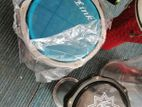

1/1 [==============================] - 0s 52ms/step
Predicted Class: 181181


IndexError: ignored

In [47]:
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from IPython.display import Image, display
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(107, 142, 3), activation='relu'))
count = 0
class_names = ['Guitar', 'Microphone', 'Drums', 'Piano']
y_pred = []
y_true = []
column_names=['images', 'class', 'height', 'width', 'channels', 'filesize']
df_test_gen = pd.DataFrame(test, columns=column_names)
for i, row in df_test_gen.iterrows():
    count += 1

    if count == 2:
        break
    else:
        images = row['images']
        img_path = os.path.join(path, images)
        display(Image(filename=img_path, width=300))
        img = image.load_img(img_path)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x.astype('float32') / 255.0
        labels = row['class']
        prediction = model.predict(x)
 #       for j in range(len(images)):
 #           image = images[j]
  #          label = labels[j]
  #          prediction = predictions[j]
            # Converte o array de previsão para visualizar a classe e a probabilidade
        predicted_class = np.argmax(prediction)
        print('Predicted Class:', predicted_class)
 #       probability = prediction[0][predicted_class]
        y_pred.append(class_names[predicted_class])
 #       probability = predictions[predicted_class]
            # Convert each element of the 'labels' array to its corresponding class name
 #           label = class_names[int(label[0])]
        y_true = labels
 #           label = [class_names[int(l)] for l in label]
#            for w in label:
 #             print(w)
  #            y_true.append(w)
 #           for y in image:
 #             plt.imshow(y)



# Now y_true contains the true labels, and y_pred contains the predicted labels.

# Função para exibir as imagens com as informações
        def plot_images_with_labels(images, true_labels, predicted_labels, class_names, probabilities=None, n_cols=5):
          n_rows = int(np.ceil(len(images) / n_cols))
          fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 30))

          for i, ax in enumerate(axes.flat):
            if i < len(images):
              ax.imshow(images[i], cmap='gray')
              ax.set_xticks([])
              ax.set_yticks([])

              true_label = true_labels[i]
              predicted_label = predicted_labels[i]
              probability = probabilities[i] if probabilities else None

              ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}', color=('green' if true_label == predicted_label else 'red'))

              if probabilities:
                ax.set_xlabel(f'Probability: {probability:.2f}')
              else:
                ax.axis('off')

            plt.tight_layout()
            plt.show()

# Chame a função para exibir as imagens
plot_images_with_labels(images, y_true, y_pred, class_names, probabilities=False)





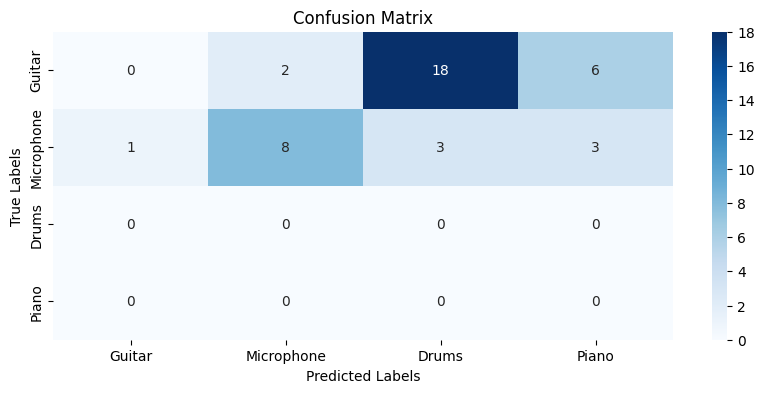

In [67]:
#imprimindo a matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crie a matriz de confusão
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Exiba a matriz de confusão usando um heatmap do Seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()